**ANÁLISIS EXPLORATORIO Y DESCRIPTIVO DE LOS DATOS**

Se importa el csv con el que vamos a trabajar. En nuestro caso con bank.csv. Los datos incluidos en el csv están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria. El objetivo es predecir si el cliente suscribirá un deposito a plazos en dicha institucion bancaria.

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
mainpath ="/content/"
filename = "bank-additional-full.csv"
fullpath = os.path.join(mainpath, filename)

In [2]:
data = pd.read_csv(fullpath,sep=";")

Visualización del dataset

In [3]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
10652,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
10653,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
10654,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Visualización de la dimensión del dataset.

In [4]:
data.shape

(10656, 21)

El dataset que vamos a tratar contiene 10656 registros y 20 variables mas la variable target.

Puede existir la posibilidad que existan registros duplicados entonces los eliminamos. Lo comprobamos:

In [5]:
data=data.drop_duplicates()

In [6]:
data=data.reset_index()

In [7]:
data.drop(["index"],axis=1,inplace=True)

In [8]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10648,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
10649,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
10650,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
10651,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Había tres filas duplicadas que se han eliminado.

Renombramos ciertos atributos y variables para manejarlos con mayor fluidez. La variable "y" se llamará "target" que tomaba valores yes o no, ahora tomará valores binarios 0/1.

In [9]:
data.replace(['basic.6y','basic.4y', 'basic.9y'], 'Basic', inplace=True)
data.rename(columns={'emp.var.rate':'empvarrate','cons.conf.idx':'consconfidx','cons.price.idx':'conspriceidx','nr.employed':'nremployed','day_of_week':'dayofweek','y':'target'},inplace=True)
data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])
data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["target"] = (data["target"]=="yes").astype(int)

Visualización de los diez primeros y ultimos registros del dataset con las variables y atributos renombrados.

In [10]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,dayofweek,duration,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,target
0,56,housemaid,married,Basic,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,High School,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,High School,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,Basic,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,High School,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,41,blue-collar,divorced,Basic,unknown,yes,no,telephone,may,mon,1575,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
6,55,technician,married,University Degree,no,no,no,telephone,may,mon,349,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,49,technician,married,Basic,no,no,no,telephone,may,mon,1467,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
8,34,admin.,married,High School,no,yes,no,telephone,may,mon,188,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,50,admin.,married,Basic,no,no,no,telephone,may,mon,61,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [11]:
data.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,dayofweek,duration,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,target
10643,62,retired,married,University Degree,no,no,no,cellular,nov,thu,483,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,1
10644,64,retired,divorced,Professional Course,no,yes,no,cellular,nov,fri,151,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
10645,36,admin.,married,University Degree,no,no,no,cellular,nov,fri,254,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
10646,37,admin.,married,University Degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
10647,29,unemployed,single,Basic,no,yes,no,cellular,nov,fri,112,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,0
10648,73,retired,married,Professional Course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
10649,46,blue-collar,married,Professional Course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
10650,56,retired,married,University Degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
10651,44,technician,married,Professional Course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
10652,74,retired,married,Professional Course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,0


Visualización del nombre de las columnas del dataset y de que tipo son cada una de estas. 

In [12]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'dayofweek', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'empvarrate', 'conspriceidx',
       'consconfidx', 'euribor3m', 'nremployed', 'target'], dtype=object)

In [13]:
data.dtypes

age               int64
job              object
marital          object
education        object
default          object
housing          object
loan             object
contact          object
month            object
dayofweek        object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
empvarrate      float64
conspriceidx    float64
consconfidx     float64
euribor3m       float64
nremployed      float64
target            int64
dtype: object

Visualización de la variable target (cuantos 1's y 0's hay)

In [14]:
data["target"].value_counts()

0    6017
1    4636
Name: target, dtype: int64

Se observa que la variable "target" toma un mayor número de ceros que de unos. Posteriormente veremos como afecta a los modelos.

Datos estadísticos básicos de las variables.

In [15]:
data.describe()

,age,duration,campaign,pdays,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,target
count,10653.000000,10653.000000,10653.000000,10653.000000,10653.000000,10653.000000,10653.000000,10653.000000,10653.000000,10653.000000,10653.000000
mean,40.865296,359.675209,2.232798,901.113771,0.331174,-0.638684,93.301371,-41.122529,2.993349,5141.327833,0.435183
std,11.434509,354.932905,2.108551,296.042577,0.684687,1.423009,0.489331,5.052114,1.683271,81.432551,0.495804
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,122.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.291000,5099.100000,0.000000
50%,38.000000,239.000000,2.000000,999.000000,0.000000,-0.100000,93.200000,-42.000000,4.021000,5195.800000,0.000000
75%,48.000000,483.000000,3.000000,999.000000,0.000000,-0.100000,93.444000,-36.400000,4.191000,5195.800000,1.000000
max,98.000000,4918.000000,27.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Matriz de correlaciones mediante el coeficiente de Pearson de las variables númericas.

Text(0.5, 1.05, 'Pearson correlation of Features')

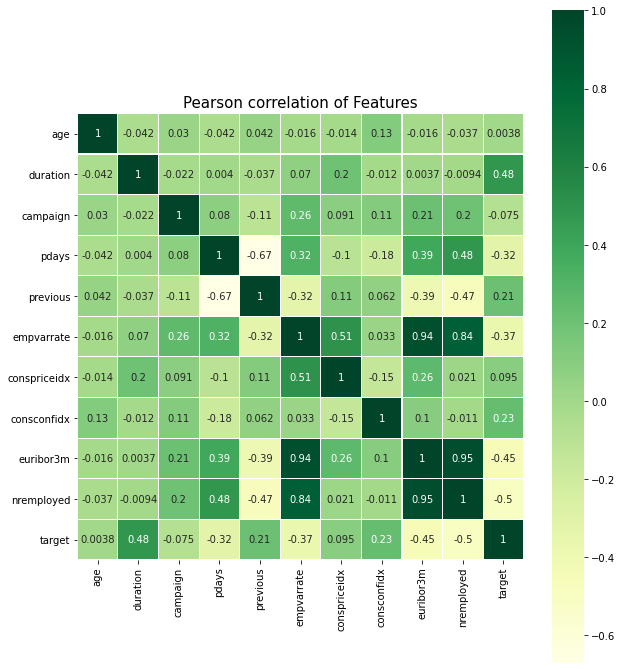

In [16]:
%matplotlib inline
corr = data.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

En verde oscuro se representa que existe una correlación alta entre variables como es el ejemplo de nremployed con euribor3m, empvarrate con nremployes, empreverrate con euribor3m. Las que aparecen por debajo de cero en un color claro presentan una correlación muy baja.

A continuación queremos comprobar la existencia o no de missings en el dataset.

In [17]:
data.notnull().sum()

age             10653
job             10653
marital         10653
education       10653
default         10653
housing         10653
loan            10653
contact         10653
month           10653
dayofweek       10653
duration        10653
campaign        10653
pdays           10653
previous        10653
poutcome        10653
empvarrate      10653
conspriceidx    10653
consconfidx     10653
euribor3m       10653
nremployed      10653
target          10653
dtype: int64

In [18]:
data.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
dayofweek       0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
empvarrate      0
conspriceidx    0
consconfidx     0
euribor3m       0
nremployed      0
target          0
dtype: int64

Con las sentencias anteriores se comprueba que no existen missings(filas y columnas sin datos). Los missings de este dataset se presentan con forma "unknown" en las variables job, marital,education,housing y loan y en la variable poutcome como "nonexisten". Se visualiza a continuación:

In [19]:
num_missing=(data[['job','marital','education','housing','loan','default']]=='unknown').sum()
num_missing_poutcome=(data[['poutcome']]=='nonexistent').sum()
print(num_missing)


job            64
marital        23
education     432
housing       229
loan          229
default      1274
dtype: int64


In [20]:
print(num_missing_poutcome)

poutcome    8032
dtype: int64


Se han contabilizado el numero de missings en forma de "unknown" de estas variables y de "nonexistent" en las variables mencionadas anterioremente. Se observa que las variables education, housing,loan y poutcome presentan un valor alto de missings.Mas tarde consideraremos elimanar dichas variables y en las variables que dejamos para seguir trabajando con ellas las codificaremos categoricamente o mediante dummies, dependiendo del modelo que tratemos.

Para seguir obteniendo información del dataset con el que estamos trabajando, visualizamos los datos aplicando la media de cada una de las variables y agrupando por la variable target.

In [21]:
data.groupby("target").mean()

,age,duration,campaign,pdays,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed
target,,,,,,,,,,
0,40.827655,210.733422,2.372112,985.294333,0.206415,-0.179491,93.260773,-42.147565,3.665024,5176.984128
1,40.914150,552.984685,2.051984,791.856989,0.493097,-1.234664,93.354061,-39.792148,2.121591,5095.050022


VISUALIZACIÓN DE LOS DATOS

Visualización del histograma y cuantos 1's y 0's tiene la variable target.

0    6017
1    4636
Name: target, dtype: int64


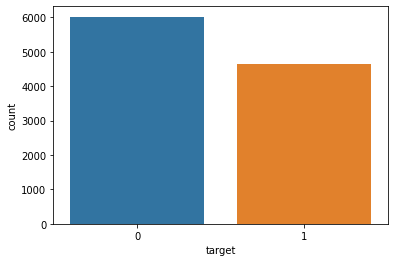

In [22]:
print(data.target.value_counts())
sns.countplot(x='target', data=data)

Visualización de los histogramas de cada una de las variables categóricas y cuantos atributos tiene una variable.

admin.           2963
technician       1826
blue-collar      1617
management        998
services          827
retired           609
entrepreneur      435
self-employed     409
student           346
unemployed        336
housemaid         223
unknown            64
Name: job, dtype: int64


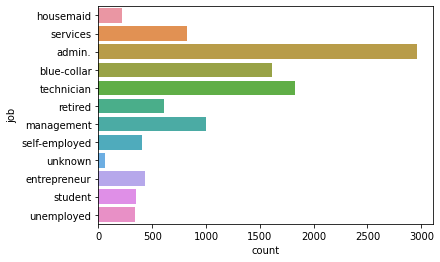

In [23]:
print(data.job.value_counts())
sns.countplot(y='job', data=data)

no         9378
unknown    1274
yes           1
Name: default, dtype: int64


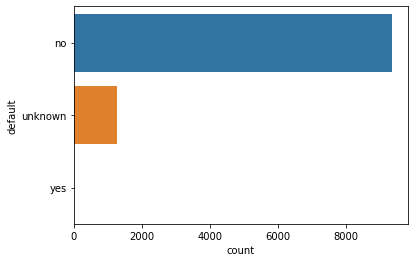

In [24]:
print(data.default.value_counts())
sns.countplot(y='default', data=data)

married     6287
single      3098
divorced    1245
unknown       23
Name: marital, dtype: int64


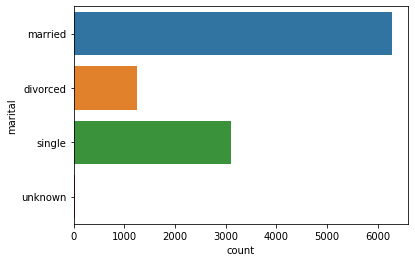

In [25]:
print(data.marital.value_counts())
sns.countplot(y='marital', data=data)

University Degree      3923
Basic                  2577
High School            2276
Professional Course    1438
unknown                 432
Illiterate                7
Name: education, dtype: int64


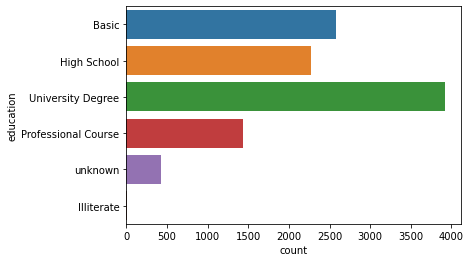

In [26]:
print(data.education.value_counts())
sns.countplot(y='education', data=data)

yes        5974
no         4450
unknown     229
Name: housing, dtype: int64


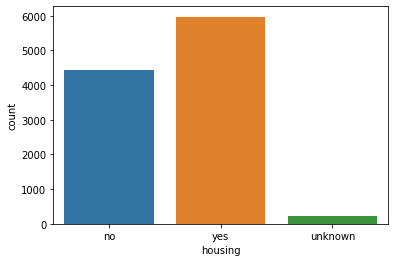

In [27]:
print(data.housing.value_counts())
sns.countplot(x='housing', data=data)

no         8859
yes        1565
unknown     229
Name: loan, dtype: int64


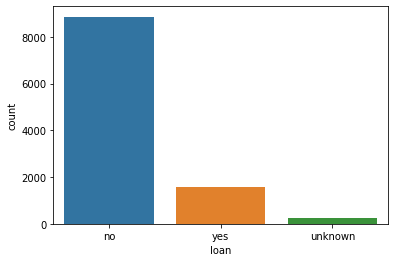

In [28]:
print(data.loan.value_counts())
sns.countplot(x='loan', data=data)

nonexistent    8032
failure        1651
success         970
Name: poutcome, dtype: int64


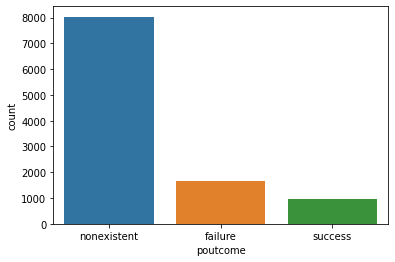

In [29]:
print(data.poutcome.value_counts())
sns.countplot(x='poutcome', data=data)

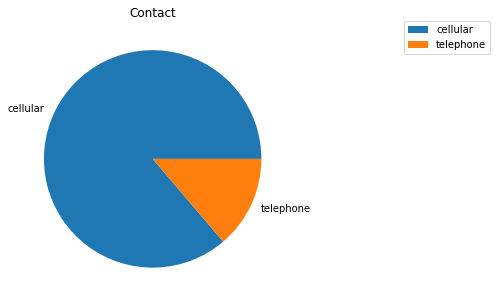

In [30]:
contact = pd.crosstab(index=data["contact"],columns='qwe')
plot = contact.plot.pie(y='qwe', figsize=(5, 5), label = '')
plt.legend(bbox_to_anchor=(1.76,1.025), loc="upper right")
plt.title('Contact')
plt.show()

Visualización de los histogramas de cada una de las variables númericas y cuantos atributos tiene una variable.

31    541
32    502
33    477
30    461
34    428
     ... 
17      2
89      2
98      2
87      1
95      1
Name: age, Length: 76, dtype: int64


Text(0.5, 1.0, 'Histograma de la edad')

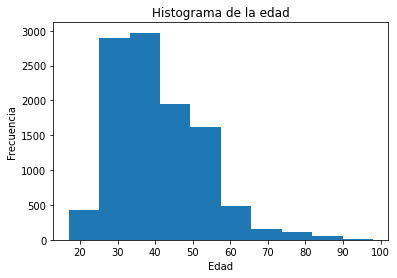

In [31]:
print(data.age.value_counts())
plt.hist(data["age"]) 
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de la edad")

1     5149
2     2783
3     1187
4      576
5      312
6      196
7      125
8       66
9       66
10      52
11      45
13      21
12      17
14      15
17      14
15       9
18       5
19       3
16       3
23       2
21       2
22       2
20       1
24       1
27       1
Name: campaign, dtype: int64


Text(0.5, 1.0, 'Histograma de contactos con clientes')

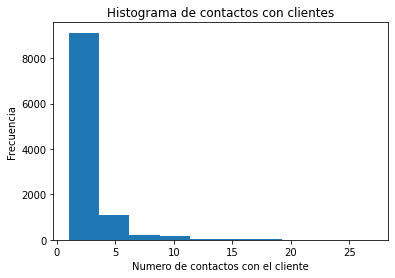

In [32]:
print(data.campaign.value_counts())
plt.hist(data["campaign"]) 
plt.xlabel("Numero de contactos con el cliente")
plt.ylabel("Frecuencia")
plt.title("Histograma de contactos con clientes")

0    8032
1    2007
2     407
3     145
4      44
5      13
6       4
7       1
Name: previous, dtype: int64


Text(0.5, 1.0, 'Histograma de contacto clientes')

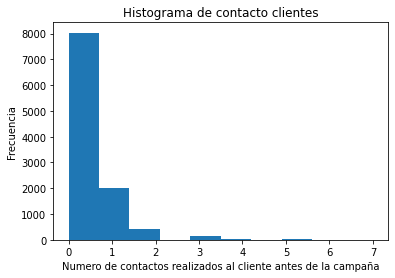

In [33]:
print(data.previous.value_counts())
plt.hist(data["previous"]) 
plt.xlabel("Numero de contactos realizados al cliente antes de la campaña")
plt.ylabel("Frecuencia")
plt.title("Histograma de contacto clientes")

-0.1    3658
-1.8    2694
 1.4    2030
-2.9     593
-1.7     465
-3.4     454
-1.1     381
 1.1     280
-3.0      88
-0.2      10
Name: empvarrate, dtype: int64


Text(0.5, 1.0, 'Histograma de tasa de variacion de empleo')

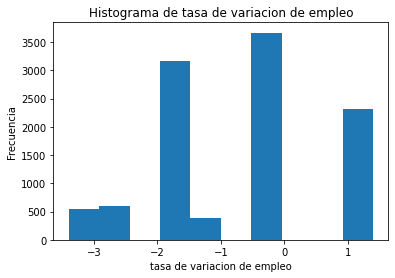

In [34]:
print(data.empvarrate.value_counts())
plt.hist(data["empvarrate"]) 
plt.xlabel("tasa de variacion de empleo")
plt.ylabel("Frecuencia")
plt.title("Histograma de tasa de variacion de empleo")

93.200    3591
93.075    1519
93.444    1329
92.893     524
93.918     514
92.843     282
93.994     280
92.201     264
92.963     264
94.465     187
92.431     180
94.215     176
94.055     169
92.649     168
94.199     150
93.369     150
94.767     128
93.876     122
94.027     120
92.379     106
94.601     103
93.749      97
92.713      88
93.798      67
92.469      65
92.756      10
Name: conspriceidx, dtype: int64


Text(0.5, 1.0, 'Histograma del indice de precios al consumidor')

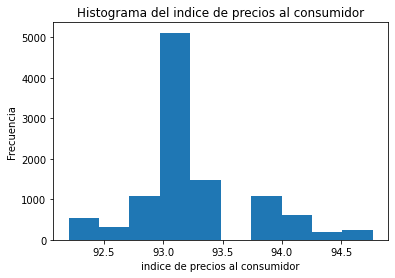

In [35]:
print(data.conspriceidx.value_counts())
plt.hist(data["conspriceidx"]) 
plt.xlabel("indice de precios al consumidor")
plt.ylabel("Frecuencia")
plt.title("Histograma del indice de precios al consumidor")

-42.0    3591
-47.1    1519
-36.1    1329
-46.2     524
-42.7     514
-50.0     282
-36.4     280
-31.4     264
-40.8     264
-41.8     187
-26.9     180
-40.3     176
-39.8     169
-30.1     168
-34.8     150
-37.5     150
-50.8     128
-40.0     122
-38.3     120
-29.8     106
-49.5     103
-34.6      97
-33.0      88
-40.4      67
-33.6      65
-45.9      10
Name: consconfidx, dtype: int64


Text(0.5, 1.0, 'Histograma del indice de confianza del consumidor')

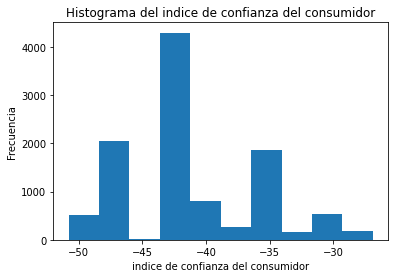

In [36]:
print(data.consconfidx.value_counts())
plt.hist(data["consconfidx"]) 
plt.xlabel("indice de confianza del consumidor")
plt.ylabel("Frecuencia")
plt.title("Histograma del indice de confianza del consumidor")

4.076    822
4.120    756
4.153    689
4.021    676
4.191    586
        ... 
0.921      1
0.944      1
3.816      1
3.901      1
3.669      1
Name: euribor3m, Length: 302, dtype: int64


Text(0.5, 1.0, 'Histograma del euribor')

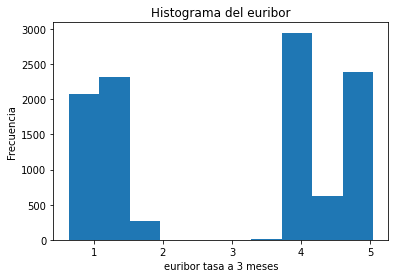

In [37]:
print(data.euribor3m.value_counts())
plt.hist(data["euribor3m"]) 
plt.xlabel("euribor tasa a 3 meses")
plt.ylabel("Frecuencia")
plt.title("Histograma del euribor")

5195.8    3658
5099.1    2325
5228.1    2030
5076.2     593
4991.6     465
5017.5     454
4963.6     381
5008.7     369
5191.0     280
5023.5      88
5176.3      10
Name: nremployed, dtype: int64


Text(0.5, 1.0, 'Histograma del numero de empleados')

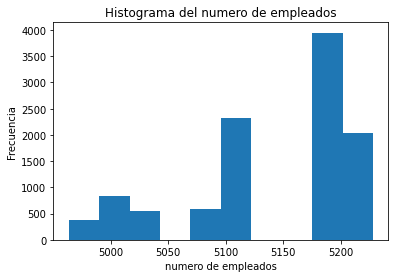

In [38]:
print(data.nremployed.value_counts())
plt.hist(data["nremployed"]) 
plt.xlabel("numero de empleados")
plt.ylabel("Frecuencia")
plt.title("Histograma del numero de empleados")

Visualización cruzada de datos 

Text(0, 0.5, 'Frecuencia de compra del producto')

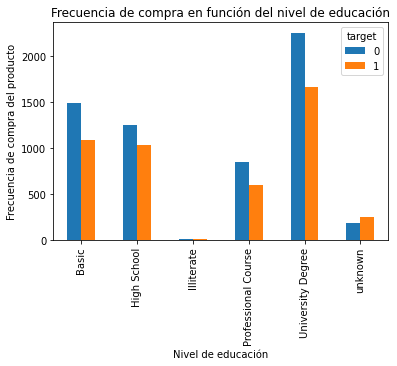

In [39]:
pd.crosstab(data.education, data.target).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporción de clientes')

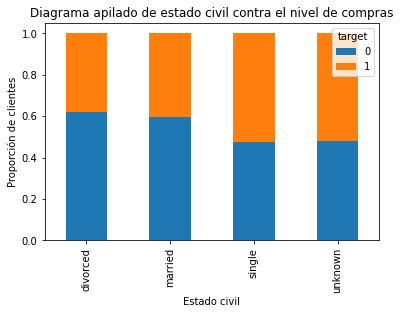

In [40]:
table=pd.crosstab(data.marital, data.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Proporción de clientes')

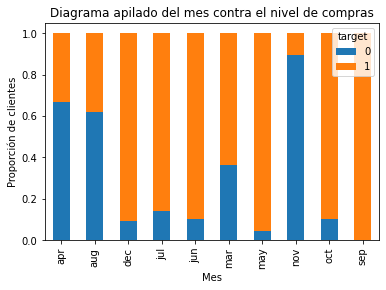

In [41]:
table=pd.crosstab(data.month, data.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado del mes contra el nivel de compras")
plt.xlabel("Mes")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Proporción de clientes')

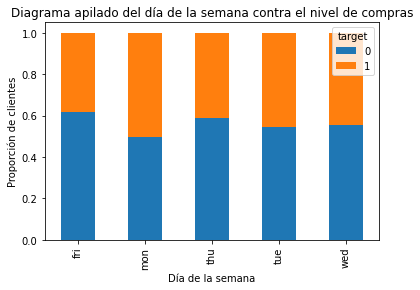

In [42]:
table=pd.crosstab(data.dayofweek, data.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado del día de la semana contra el nivel de compras")
plt.xlabel("Día de la semana")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Proporción de clientes')

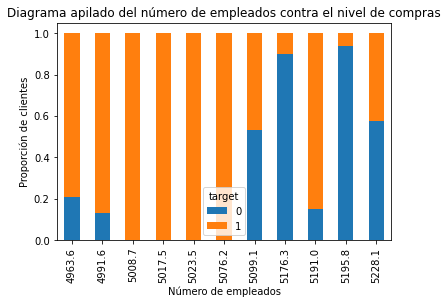

In [43]:
table=pd.crosstab(data.nremployed, data.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado del número de empleados contra el nivel de compras")
plt.xlabel("Número de empleados")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Proporción de clientes')

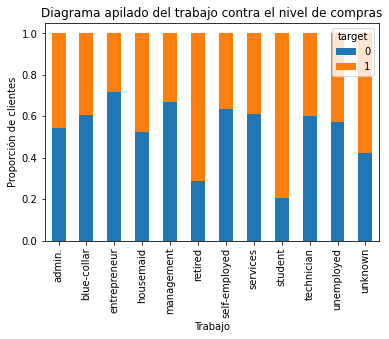

In [44]:
table=pd.crosstab(data.job, data.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado del trabajo contra el nivel de compras")
plt.xlabel("Trabajo")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Proporción de clientes')

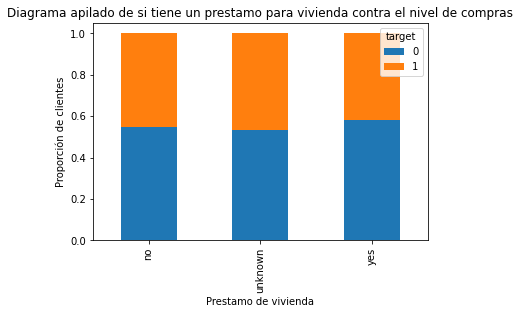

In [45]:
table=pd.crosstab(data.housing, data.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de si tiene un prestamo para vivienda contra el nivel de compras")
plt.xlabel("Prestamo de vivienda")
plt.ylabel("Proporción de clientes")

Outliers

In [46]:

def find_outlier(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices,outlier_values

In [47]:

Outlier = pd.DataFrame(columns=['ColumnName','OutlierFreq'])


In [48]:
tukey_ind, tukey_values = find_outlier(data['age']) 
print('age \t\t\t'+ str(len(np.sort(tukey_values))))
Outlier.loc[1] = ['age',len(np.sort(tukey_values))]
tukey_ind, tukey_values = find_outlier(data['duration']) 
print('duration \t\t'+ str(len(np.sort(tukey_values))))
Outlier.loc[2] = ['duration',len(np.sort(tukey_values))]
tukey_ind, tukey_values = find_outlier(data['campaign']) 
print('campaign \t\t'+ str(len(np.sort(tukey_values))))
Outlier.loc[3] = ['campaign',len(np.sort(tukey_values))]
tukey_ind, tukey_values = find_outlier(data['pdays']) 
print('pdays \t\t\t'+ str(len(np.sort(tukey_values))))
Outlier.loc[4] = ['pdays',len(np.sort(tukey_values))]
tukey_ind, tukey_values = find_outlier(data['empvarrate']) 
print('emp.var.rate \t\t'+ str(len(np.sort(tukey_values))))
Outlier.loc[5] = ['emp.var.rate',len(np.sort(tukey_values))]
tukey_ind, tukey_values = find_outlier(data['conspriceidx']) 
print('cons.price.idx \t\t'+ str(len(np.sort(tukey_values))))
Outlier.loc[6] = ['cons.price.idx',len(np.sort(tukey_values))]
tukey_ind, tukey_values = find_outlier(data['consconfidx']) 
print('cons.conf.idx \t\t'+ str(len(np.sort(tukey_values))))
Outlier.loc[7] = ['cons.conf.idx',len(np.sort(tukey_values))]
tukey_ind, tukey_values = find_outlier(data['euribor3m']) 
print('euribor3m \t\t'+ str(len(np.sort(tukey_values))))
Outlier.loc[8] = ['euribor3m',len(np.sort(tukey_values))]
tukey_ind, tukey_values = find_outlier(data['nremployed']) 
print('nr.employed \t\t'+ str(len(np.sort(tukey_values))))
Outlier.loc[9] = ['nr.employed',len(np.sort(tukey_values))]

age 			181
duration 		593
campaign 		450
pdays 			1050
emp.var.rate 		0
cons.price.idx 		1648
cons.conf.idx 		180
euribor3m 		0
nr.employed 		0


Text(0.5, 1.0, 'Frecuencia de outliers en las variables')

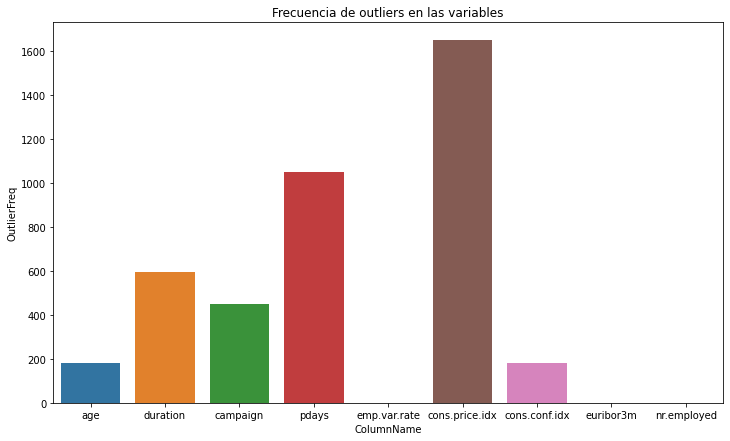

In [49]:
plt.rcParams['figure.figsize'] = (12, 7)
sns.barplot( x ='ColumnName', y="OutlierFreq", data=Outlier) 
plt.title("Frecuencia de outliers en las variables")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


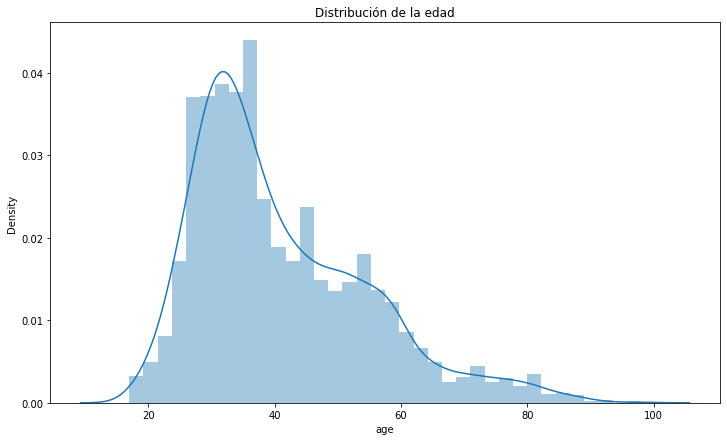

In [50]:
#Distribuimos la variable edad en un histograma solo de los clientes suscritos a un cliente
sns.distplot(data.loc[data['target'] == 1]['age'])
plt.title("Distribución de la edad")
plt.show()

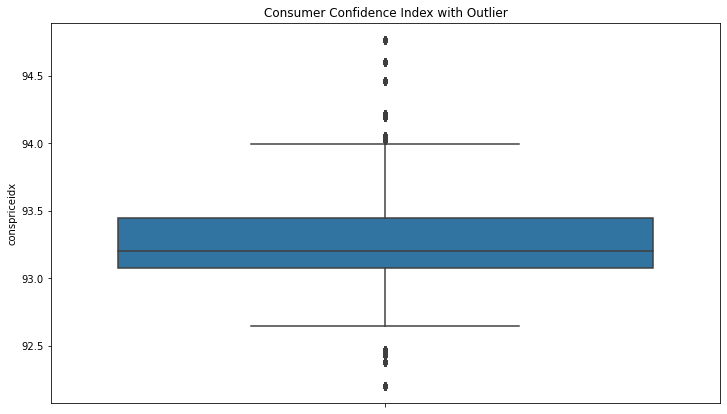

In [51]:

sns.boxplot( y="conspriceidx", data=data) 
plt.title('Consumer Confidence Index with Outlier')
plt.show()

Finalmente llegamos a la conclusión que para continuar con el análisis eliminaremos ciertas variables como, por ejemplo, duration ya que esta variable afecta en gran medida a la variable target. Si duration=0 entonces y ="no". No se conoce la duración antes de realizar la llamada. Se descartan además las variables poutcome, education,loan,default y housing por la cantidad de missings que presentan.Además de variables que no interesan como campaing,pdays.

In [52]:
data.drop(["default","duration", "loan", "poutcome","campaign", "pdays","contact","education","housing"],axis=1,inplace=True)

Visualizamos el nuevo dataset

In [53]:
data

,age,job,marital,month,dayofweek,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,target
0,56,housemaid,married,may,mon,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,may,mon,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,may,mon,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,may,mon,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,may,mon,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10648,73,retired,married,nov,fri,0,-1.1,94.767,-50.8,1.028,4963.6,1
10649,46,blue-collar,married,nov,fri,0,-1.1,94.767,-50.8,1.028,4963.6,0
10650,56,retired,married,nov,fri,0,-1.1,94.767,-50.8,1.028,4963.6,0
10651,44,technician,married,nov,fri,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [54]:
data.shape

(10653, 12)

El nuevo dataset contiene el mismo número de registros pero ahora tenemos 11 variables y la variable target con 8913 registros.

In [55]:
data.to_csv("/content/bankmod.csv",index=False)